In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("STUDENTS_RAW_DATA (1).csv")
df.head()

,student_id,age,gender,city,course_stream,study_hours_per_week,attendance_rate,prior_gpa_10pt,has_internet,device_type,parental_education,test_score,admission_date,fee_paid_inr,scholarship,comments
0,S0001,24,Female,Mumbai,MCA,11.2,46.2,6.88,Unknown,NaN,PhD,58.4,11-08-2023,63952,Partial,
1,S0002,21,,Mumbai,BBA,14.9,64.3,5.87,N,Mobile,NaN,85.8,2023-04-29,62085,Yes,Late enrollment
2,S0003,24,Female,Bengaluru,NaN,13.4,57.7,10.29,N,Tablet,NaN,89.3,29/08/2023,55598,Yes,Transferred from another program
3,S0004,28,FEMALE,Remote,ME,8.9,64.6,7.27,N,Laptop,Undergrad,59.4,02-02-2024,54627,Partial,Good coder
4,S0005,21,Male,Bengaluru,EE,11.0,52.2,7.22,Unknown,Desktop,PhD,55.5,01-15-2024,NaN,No,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            205 non-null    object 
 1   age                   205 non-null    int64  
 2   gender                201 non-null    object 
 3   city                  201 non-null    object 
 4   course_stream         161 non-null    object 
 5   study_hours_per_week  201 non-null    float64
 6   attendance_rate       205 non-null    float64
 7   prior_gpa_10pt        202 non-null    float64
 8   has_internet          201 non-null    object 
 9   device_type           171 non-null    object 
 10  parental_education    159 non-null    object 
 11  test_score            203 non-null    float64
 12  admission_date        205 non-null    object 
 13  fee_paid_inr          198 non-null    object 
 14  scholarship           154 non-null    object 
 15  comments              1

In [75]:
df.describe()

,age,study_hours_per_week,attendance_rate,prior_gpa_10pt,test_score
count,205.000000,201.000000,205.000000,202.000000,203.000000
mean,23.204878,12.361692,74.586341,7.299455,71.091133
std,12.387809,7.019279,16.906314,1.328183,17.879490
min,-1.000000,-3.000000,45.300000,4.020000,-5.000000
25%,19.000000,8.900000,59.800000,6.510000,60.000000
50%,22.000000,11.900000,74.900000,7.195000,71.000000
75%,24.000000,15.300000,89.500000,7.957500,81.150000
max,120.000000,60.000000,104.400000,11.500000,133.000000


In [76]:
df.describe(include="object")

,student_id,gender,city,course_stream,has_internet,device_type,parental_education,admission_date,fee_paid_inr,scholarship,comments
count,205,201,201,161,201,171,159,205,198,154,166
unique,200,9,24,8,7,5,5,195,193,3,6
top,S0005,Female,Mumbai,MCA,Y,Mobile,Postgrad,"May 01, 2025",59487,Partial,Transferred from another program
freq,2,32,21,27,35,45,38,3,2,56,33


In [77]:
missing = df.isna().sum().sort_values(ascending=False)
missing

scholarship             51
parental_education      46
course_stream           44
comments                39
device_type             34
fee_paid_inr             7
gender                   4
city                     4
study_hours_per_week     4
has_internet             4
prior_gpa_10pt           3
test_score               2
student_id               0
age                      0
attendance_rate          0
admission_date           0
dtype: int64

In [78]:
df.nunique().sort_values(ascending=False)

student_id              200
admission_date          195
fee_paid_inr            193
attendance_rate         177
test_score              163
prior_gpa_10pt          146
study_hours_per_week    125
city                     24
age                      19
gender                    9
course_stream             8
has_internet              7
comments                  6
device_type               5
parental_education        5
scholarship               3
dtype: int64

In [79]:
categorical_cols = ["gender", "city", "course_stream","has_internet", "device_type","parental_education", "scholarship"]
for col in categorical_cols:
    print(f"\nValue counts for {col}")
    print(df[col].value_counts(dropna=False))


Value counts for gender
gender
Female               32
M                    30
                     26
male                 21
F                    20
FEMALE               19
Male                 19
Prefer not to say    17
Other                17
NaN                   4
Name: count, dtype: int64

Value counts for city
city
Mumbai        21
Remote        16
Bengaluru     15
Pune          12
Chennai       12
chennai       11
Kolkata       11
kolkata       10
hyderabad     10
Hyderabad      9
Hyderabad      7
Mumbai         7
Pune           7
Remote         7
Delhi          6
pune           6
Delhi          6
remote         5
Chennai        5
Kolkata        5
bengaluru      4
NaN            4
Bengaluru      4
mumbai         3
delhi          2
Name: count, dtype: int64

Value counts for course_stream
course_stream
NaN    44
MCA    27
BSc    27
EE     25
BBA    19
ME     19
CS     18
ECE    14
MBA    12
Name: count, dtype: int64

Value counts for has_internet
has_internet
Y          35
N  

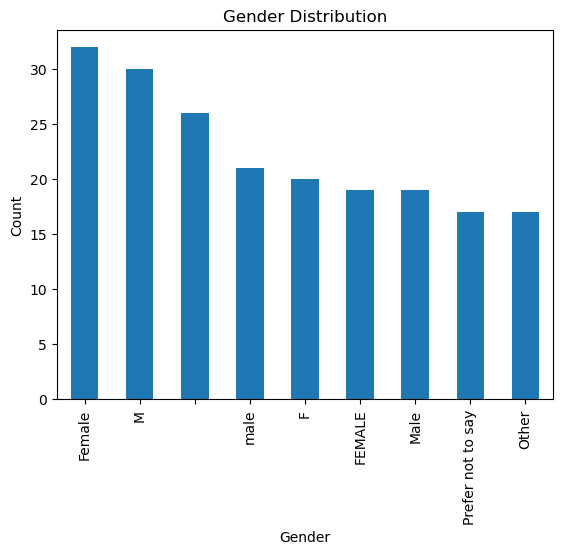

In [80]:
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

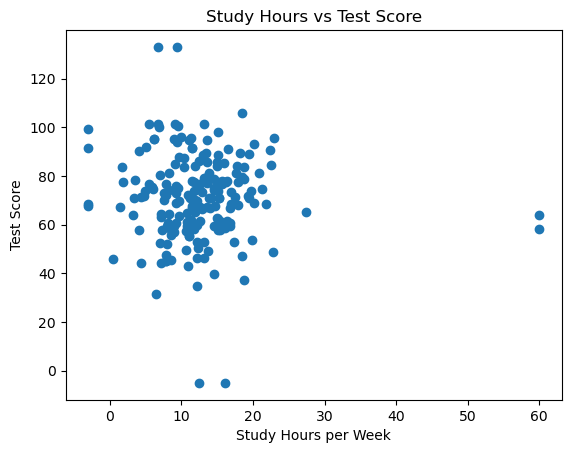

In [81]:
plt.scatter(df["study_hours_per_week"], df["test_score"])
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Score")
plt.title("Study Hours vs Test Score")
plt.show()

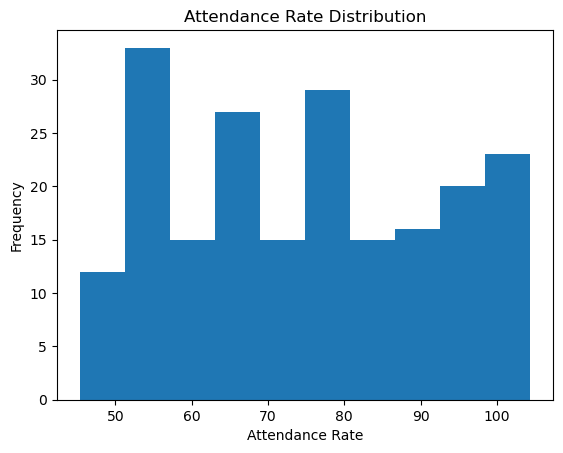

In [82]:
df["attendance_rate"].plot(kind="hist", bins=10)
plt.title("Attendance Rate Distribution")
plt.xlabel("Attendance Rate")
plt.show()